<a href="https://colab.research.google.com/github/ShreyaMandot/Topic-Modelling-Using-LDA-Top2Vec-BERTopic/blob/main/BertTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 83.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd 
from bertopic import BERTopic

df_bert = pd.read_csv('Clean_Tweets.csv')
Bert_df = df_bert.loc[:,['new_text']]
#tweets_df.info()

Bert_df['new_text']= df_bert['new_text'].str.lower().astype('str')

doc1 = Bert_df.new_text.to_list()

topic_model = BERTopic(verbose=True, nr_topics=65)
topics, _ = topic_model.fit_transform(doc1)

# Preprocess Documents
documents = pd.DataFrame({"Document": doc1,
                          "ID": range(len(doc1)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

print(topic_words)

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

#print('\nPerplexity: ', topic_model.log_perplexity(doc1))  # a measure of how good the model is. lower the better.


topic_model.get_topic_info()

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/291 [00:00<?, ?it/s]

2023-01-11 15:04:34,398 - BERTopic - Transformed documents to Embeddings
2023-01-11 15:05:11,654 - BERTopic - Reduced dimensionality
2023-01-11 15:05:12,061 - BERTopic - Clustered reduced embeddings
2023-01-11 15:05:25,493 - BERTopic - Reduced number of topics from 117 to 66


[['sertraline', 'the', 'on', 'im', 'to', 'and', 'my', 'of', 'it', 'me'], ['zoloft', 'my', 'and', 'me', 'to', 'on', 'it', 'the', 'like', 'you'], ['lexapro', 'my', 'and', 'to', 'me', 'for', 'it', 'like', 'but', 'the'], ['wellbutrin', 'my', 'on', 'to', 'the', 'this', 'im', 'is', 'me', 'and'], ['trazodone', 'sleep', 'night', 'take', 'to', 'and', 'my', 'me', 'nycacc', 'mg'], ['amitriptyline', 'pain', 'it', 'for', 'amp', 'you', 'nortriptyline', 'to', 'or', 'the'], ['effexor', 'off', 'withdrawal', 'my', 'to', 'on', 'so', 'the', 'it', 'and'], ['fluoxetine', 'on', 'is', 'me', 'fluoride', 'my', 'the', 'of', 'and', 'to'], ['venlafaxine', 'the', 'to', 'it', 'spideogx', 'off', 'of', 'and', 'on', 'my'], ['citalopram', 'take', 'my', 'the', 'of', 'if', 'and', 'erinmhk', 'on', 'to'], ['cymbalta', 'my', 'but', 'it', 'im', 'so', 'me', 'for', 'like', 'to'], ['adhd', 'adderall', 'wellbutrin', 'adhddesigner', 'for', 'and', 'concerta', 'also', 'on', 'but'], ['celexa', 'needs', 'hydrochloride', 'this', 'my', 

,Topic,Count,Name
0,-1,2059,-1_and_the_to_of
1,0,902,0_sertraline_the_on_im
2,1,852,1_zoloft_my_and_me
3,2,785,2_lexapro_my_and_to
4,3,383,3_wellbutrin_my_on_to
...,...,...,...
61,60,24,60_psilocybin_expectancy_vs_trial
62,61,23,61_selegiline_metabolized_webmasterdave_metabo...
63,62,22,62_drmcthickens_prozac_trying_inpatient
64,63,22,63_tickets_pit_twitter_abel


In [4]:
print(coherence)

0.662656894257272


In [5]:
topic_model.visualize_topics()

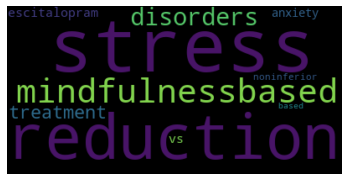

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="black", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
create_wordcloud(topic_model, topic=31)

In [7]:
topic_model.visualize_barchart()